### 1. MATRIČNA ZABAVA

Matrica $M_n(p)$ je $n \times n$ matrica čiji su članovi oblika $\sqrt[p]{\log_p{k}}$, gdje je $k$ indeks člana matrice. Zadatak je kreirati funkciju koja minimizira trag matrice $(M_n(p))^n$, gdje eksponent predstavlja matrično množenje.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import minimize_scalar
%matplotlib inline

In [2]:
# funkcija koja računa trag matrice n x n iz zadatka
def trag(n, p):
    Mn = [[0 for i in range (n)] for j in range(n)]
    M = np.identity(n) # jedinična matrica dimenzije n x n
    for i in range(0, n):
        for j in range(0, n):
            k = min(i+1, j+1)
            Mn[i][j] = pow(np.log(k)/np.log(p), 1/p) # kreiramo matricu M_n
    for i in range(n): M = np.dot(M, Mn) # množimo matricu M_n samu sa sobom n puta
    tr = np.trace(M)
    return tr

# funkcija koja minimizira trag
def tr_min(n):
    return minimize_scalar(lambda p: trag(n, p), bracket=(1.1, 2*n)).x

In [3]:
n = 5
print("Minimalni trag za n =", n, "je", tr_min(n))

Minimalni trag za n = 5 je 5.767644674152974


### 2. SREĆA

Napravljena je simulacija opisana u videu 'Is success luck or hard work?' (https://www.youtube.com/watch?v=3LopI4YeC4I). Svakom kandidatu pridjeljeni su nasumični 'skill score' i 'luck score', od čega 'skill score' ima važnost od $95\%$ pri uspjehu kandidata. Nakon provedene simulacije, izračunat je prosjek sreće uspješnih kandidata, te je prikazan spektar udjela sreće kod onih kandidata koji su bili uspješni.

In [4]:
def simulacija(N):
    n = 18300 # ukupan broj kandidata
    uspjesni = [] # polje sa 'luck scores' uspješnih kandidata
    for i in range(N):
        rezultati = []
        sreca = []
        for j in range(n):
            skill = np.random.uniform(0, 100)
            luck = np.random.uniform(0, 100)
            score = skill*0.95 + luck*0.05
            rezultati += [score]
            sreca += [luck]
        indeksi = (-np.array(rezultati)).argsort()[:11] # sortiramo polje po najvećim rezultatima, zatim indekse tih rezultata
                                                        # soritramo silazno, te pomoću slicinga uzmemo 11 najvećih
        for ind in indeksi:
            uspjesni += [sreca[ind]]
    return uspjesni

In [5]:
N = 1000 # broj ponavljanja simulacije

sreca = simulacija(N)
print("Prosjek sreće uspješnih kandidata iznosi", np.average(sreca))

Prosjek sreće uspješnih kandidata iznosi 94.79019391927034


Text(0.5, 1.0, 'Spektar udjela sreće uspješnih kandidata')

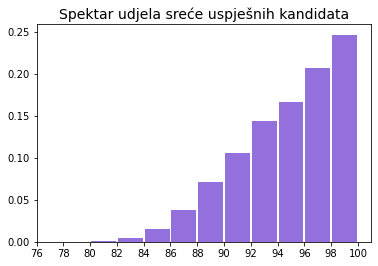

In [6]:
ticks = [i for i in range(76, 101, 2)]
plt.axes(xticks=ticks, xlim=[76, 101])
plt.hist(sreca, weights=[1/(N*11)]*(N*11), color = 'mediumpurple', rwidth = 0.93, bins=ticks)
plt.title('Spektar udjela sreće uspješnih kandidata', fontsize=14)

### 3. GRAVITACIJSKA POTJERA

Kod crta putanju jednog tijela u gravitacijskom polju umjetno tjeranog drugog tijela. Problem je rješavan u dvije dimenzije, te je pretpostavljeno da je gravitacijsko ubrzanje tijela dano funkcijom: $\vec{a}(\vec{r}) = -\alpha\frac{\vec{r}}{r^3}$

Bez smanjenja općenitosti pretpostavljamo da je $y$ koordinata umjetno tjeranog tijela jednaka $0$, pa za $\vec{r}(t)$ imamo: $\vec{r}(t)=[x(t)-sin(t)]\hat{i} + y(t)\hat{j}$, gdje su $x(t)$ i $y(t)$ koordinate tijela kojem tražimo putanju.

In [7]:
from scipy.integrate import odeint
from matplotlib.animation import FuncAnimation

In [8]:
def putanja(alfa, r0, v0, T, N):

    def ax(x, y, t):
        return -alfa*(x-np.sin(t))/((np.sqrt((x-np.sin(t))**2+y**2))**3)
    def ay(x, y, t):
        return -alfa*y/((np.sqrt((x-np.sin(t))**2+y**2))**3)

    def func(p, t, ax, ay):
        x = p[0]
        y = p[1]
        vx = p[2]
        vy = p[3]
        dvx = ax(x,y,t) # akceleracija u x smjeru
        dvy = ay(x,y,t) # akceleracija u y smjeru
        return (vx, vy, dvx, dvy)
    
    poc_uvjeti = [r0[0], r0[1], v0[0], v0[1]]
    t = np.linspace(0, T, N)
    sol = odeint(func, poc_uvjeti, t, args=(ax,ay))
    return sol

def graf(alfa, r0, v0, T, N):
    sol = putanja(alfa, r0, v0, T, N)
    t = np.linspace(0, T, N)
    plt.plot(sol[:,0], sol[:,1], label='putanja promatranog tijela', color='forestgreen')
    plt.plot(np.sin(t), [0]*N, label='putanja umjetno tjeranog tijela', color='firebrick')
    plt.legend(fontsize=10)
    plt.xlabel('$x$', fontsize=14)
    plt.ylabel('$y$', fontsize=14)
    return

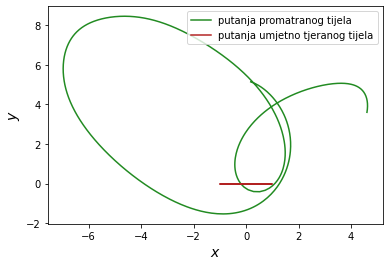

In [9]:
r0 = [4.6, 3.6]
v0 = [0.1, 0.8]
alfa = 10
T = 40
N = 1000

graf(alfa, r0, v0, T, N)

In [20]:
%matplotlib notebook
def animacija_putanje(alfa, r0, v0, T, N):
    t = np.linspace(0, T, N)
    sol = putanja(alfa, r0, v0, T, N)
    fig, ax = plt.subplots()
    point1 , = ax.plot(r0[0], r0[1], marker="o", color='forestgreen')
    point2 , = ax.plot(0, 0, marker="o", color='firebrick')
    line1 , = ax.plot(r0[0], r0[1], color='forestgreen')
    line2 , = ax.plot(0, 0, color='firebrick')
    x1 = []
    y1 = []
    x2 = []
    y2 = []
    ax.set_xlim(-10,10)
    ax.set_ylim(-5,10)

    def animacija(i):
        point1.set_data([sol[i,0]], [sol[i,1]]) # točka koja predstavlja tijelo čiju putanju računamo
        point2.set_xdata(np.sin(t)[i]) # točka koja predstavlja umjetno tjerano tijelo
        
        # putanja tijela:
        x1.append(sol[i,0])
        y1.append(sol[i,1])
        line1.set_data([x1], [y1])
        # putanja umjetno tjeranog tijela:
        x2.append(np.sin(t)[i])
        y2.append(0)
        line2.set_data([x2], [y2])
        
        return point1, point2, line1, line2

    graf = FuncAnimation(fig, animacija, frames=N, interval=0.5)
    return graf

<IPython.core.display.Javascript object>


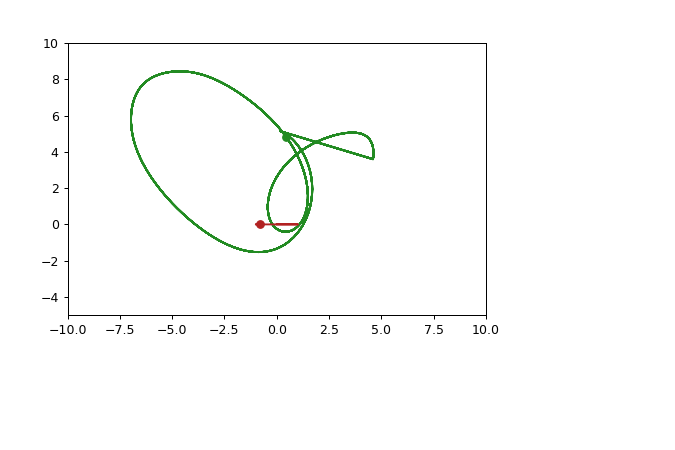

In [22]:
animacija_putanje(alfa, r0, v0, T, N)